In [ ]:
# issue: 피쳐엔지니어링 한거보다 안한게 성이좋음ㅋㅋ

# Load DF

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 이름 설정 (예: 맑은 고딕)
mpl.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False


In [2]:
import pandas as pd
df=pd.read_excel('C:/Users/YoonjinOh/Desktop/hj_df2.xlsx')

In [3]:
region_col = '지역'  # 지역명 컬럼명
region_names = df[region_col]         # 따로 저장
X = df.drop(columns=[region_col])     # 클러스터링용 데이터

In [4]:
# 문자형(문자열/범주형 등) 컬럼만 보기
X.columns

Index(['교원일인당학생수', '소득기준_사교육참여율', '소득기준_일반교과_사교육참여율', '소득기준_사교육참여시간',
       '소득기준_늘봄학교방과후학교_참여시간', '어제의_평균행복정도', '스트레스인지율_24', '학교생활_스트레스_많음이상_24',
       '재적학생100명당교원수', '총학생1000명당_독서_스카수', '총학생1000명당_입시검정보습학원수',
       '총학생1인당학원카드매출액_2312', '총학생1인당교육기관카드매출액_2312', '총학생1인당_학원교육총매출액_2312',
       '진학률', '총학생1000명당_도서관수', '총초등생1000명당_공립_초등학교수', '총초등생1000명당_사립_초등학교수',
       '총중등생1000명당_공립_중학교수', '총중등생1000명당_사립_중학교수', '총고교생1000명당_공립_고등학교수',
       '총고교생1000명당_사립_고등학교수', '실질GRDP중_교육서비스_차지비중_22',
       '재적학생100명당_실질_교육서비스업_총생산_22'],
      dtype='object')

In [5]:
X.select_dtypes(include=['object', 'category']).columns

Index(['총초등생1000명당_사립_초등학교수'], dtype='object')

In [6]:
X = X.apply(pd.to_numeric, errors='coerce')
print(X.isna())

    교원일인당학생수  소득기준_사교육참여율  소득기준_일반교과_사교육참여율  소득기준_사교육참여시간  \
0      False        False             False         False   
1      False        False             False         False   
2      False        False             False         False   
3      False        False             False         False   
4      False        False             False         False   
5      False        False             False         False   
6      False        False             False         False   
7      False        False             False         False   
8      False        False             False         False   
9      False        False             False         False   
10     False        False             False         False   
11     False        False             False         False   
12     False        False             False         False   
13     False        False             False         False   
14     False        False             False         False   
15     False        Fals

In [7]:
X = X.drop(index=[44, 45, 46, 47, 48])

In [8]:
region_names = region_names.drop(index=[44, 45, 46, 47, 48])

In [9]:
X

,교원일인당학생수,소득기준_사교육참여율,소득기준_일반교과_사교육참여율,소득기준_사교육참여시간,소득기준_늘봄학교방과후학교_참여시간,어제의_평균행복정도,스트레스인지율_24,학교생활_스트레스_많음이상_24,재적학생100명당교원수,총학생1000명당_독서_스카수,...,진학률,총학생1000명당_도서관수,총초등생1000명당_공립_초등학교수,총초등생1000명당_사립_초등학교수,총중등생1000명당_공립_중학교수,총중등생1000명당_사립_중학교수,총고교생1000명당_공립_고등학교수,총고교생1000명당_사립_고등학교수,실질GRDP중_교육서비스_차지비중_22,재적학생100명당_실질_교육서비스업_총생산_22
0,6.54,58.1,38.6,4.1,1.7,6.5,25.0,1.2,15.293752,0.685401,...,79.0,0.685401,9.021513,0.000000,7.741935,0.000000,2.849003,0.000000,0.027343,170158.532795
1,14.20,68.2,50.4,5.3,1.7,6.4,21.7,3.1,7.044630,0.986825,...,78.6,0.266709,1.644260,0.000000,1.141079,0.103734,0.836120,0.278707,0.036764,102156.947707
2,16.76,58.1,38.6,4.1,1.7,6.4,25.9,3.3,5.964949,1.175483,...,74.7,0.268682,2.335416,0.000000,1.299883,0.259977,1.121975,0.160282,0.039549,72121.313884
3,14.99,68.2,50.4,5.3,1.7,6.5,25.1,3.1,6.670217,1.061563,...,75.2,0.154973,1.533227,0.000000,1.062386,0.265596,0.936821,0.224837,0.016462,93224.036925
4,11.12,58.1,38.6,4.1,1.7,6.4,28.9,2.2,8.992445,0.895255,...,74.0,0.795782,5.699255,0.000000,2.967359,1.854599,1.431127,1.788909,0.033229,114219.429030
5,13.51,68.2,50.4,5.3,1.7,6.1,27.3,2.8,7.400181,0.979476,...,73.8,0.163246,1.976802,0.000000,1.004966,0.650272,0.560119,0.746826,0.019427,94585.486299
6,16.44,68.2,50.4,5.3,1.7,6.4,25.1,3.2,6.082879,1.294993,...,79.8,0.232435,1.714813,0.000000,1.008192,0.126024,0.997293,0.142470,0.057357,81141.173489
7,14.69,58.1,38.6,4.1,1.7,6.4,26.8,2.7,6.808134,1.737708,...,74.0,0.306654,2.631579,0.000000,1.983471,0.000000,1.650165,0.000000,0.055242,104363.395225
8,13.35,68.2,50.4,5.3,1.7,6.8,25.6,3.4,7.491242,1.402896,...,74.7,0.211758,1.086443,0.000000,1.389928,0.000000,1.240353,0.137817,0.047038,102349.525979
9,15.08,58.1,38.6,4.1,1.7,6.6,23.0,3.3,6.632683,1.220100,...,76.0,0.192647,1.532755,0.000000,1.609062,0.064362,1.061421,0.141523,0.039596,87046.607725


# EDA

In [10]:
print(X.var().sort_values())

총초등생1000명당_사립_초등학교수           1.751817e-04
실질GRDP중_교육서비스_차지비중_22         2.178509e-04
소득기준_늘봄학교방과후학교_참여시간           6.501057e-04
총학생1000명당_도서관수                2.903577e-02
어제의_평균행복정도                    3.549683e-02
총고교생1000명당_사립_고등학교수           1.782163e-01
총고교생1000명당_공립_고등학교수           2.397109e-01
총중등생1000명당_사립_중학교수            2.600732e-01
총학생1000명당_독서_스카수              3.273392e-01
소득기준_사교육참여시간                  4.931924e-01
학교생활_스트레스_많음이상_24             5.044133e-01
총중등생1000명당_공립_중학교수            1.221007e+00
총초등생1000명당_공립_초등학교수           2.770469e+00
재적학생100명당교원수                  2.808927e+00
스트레스인지율_24                    4.357801e+00
교원일인당학생수                      4.891984e+00
총학생1000명당_입시검정보습학원수           1.899662e+01
진학률                           2.446615e+01
소득기준_사교육참여율                   3.320924e+01
소득기준_일반교과_사교육참여율              4.357498e+01
재적학생100명당_실질_교육서비스업_총생산_22    4.209594e+08
총학생1인당교육기관카드매출액_2312          7.061795e+08
총학생1인당학원카드매출액_2312            3.504221e+09
총학생1인당_학원교육

In [11]:
# 분산 계산
variances = X.var()

# 분산이 낮은 변수만 추출 (기준: 하위 20%)
# low_variance_cols = variances[variances < 0.001].index.tolist
threshold = variances.quantile(0.2)
low_variance_cols = variances[variances < threshold].index.tolist()

# 출력
print("분산 낮은 변수:", low_variance_cols)


분산 낮은 변수: ['소득기준_늘봄학교방과후학교_참여시간', '어제의_평균행복정도', '총학생1000명당_도서관수', '총초등생1000명당_사립_초등학교수', '실질GRDP중_교육서비스_차지비중_22']


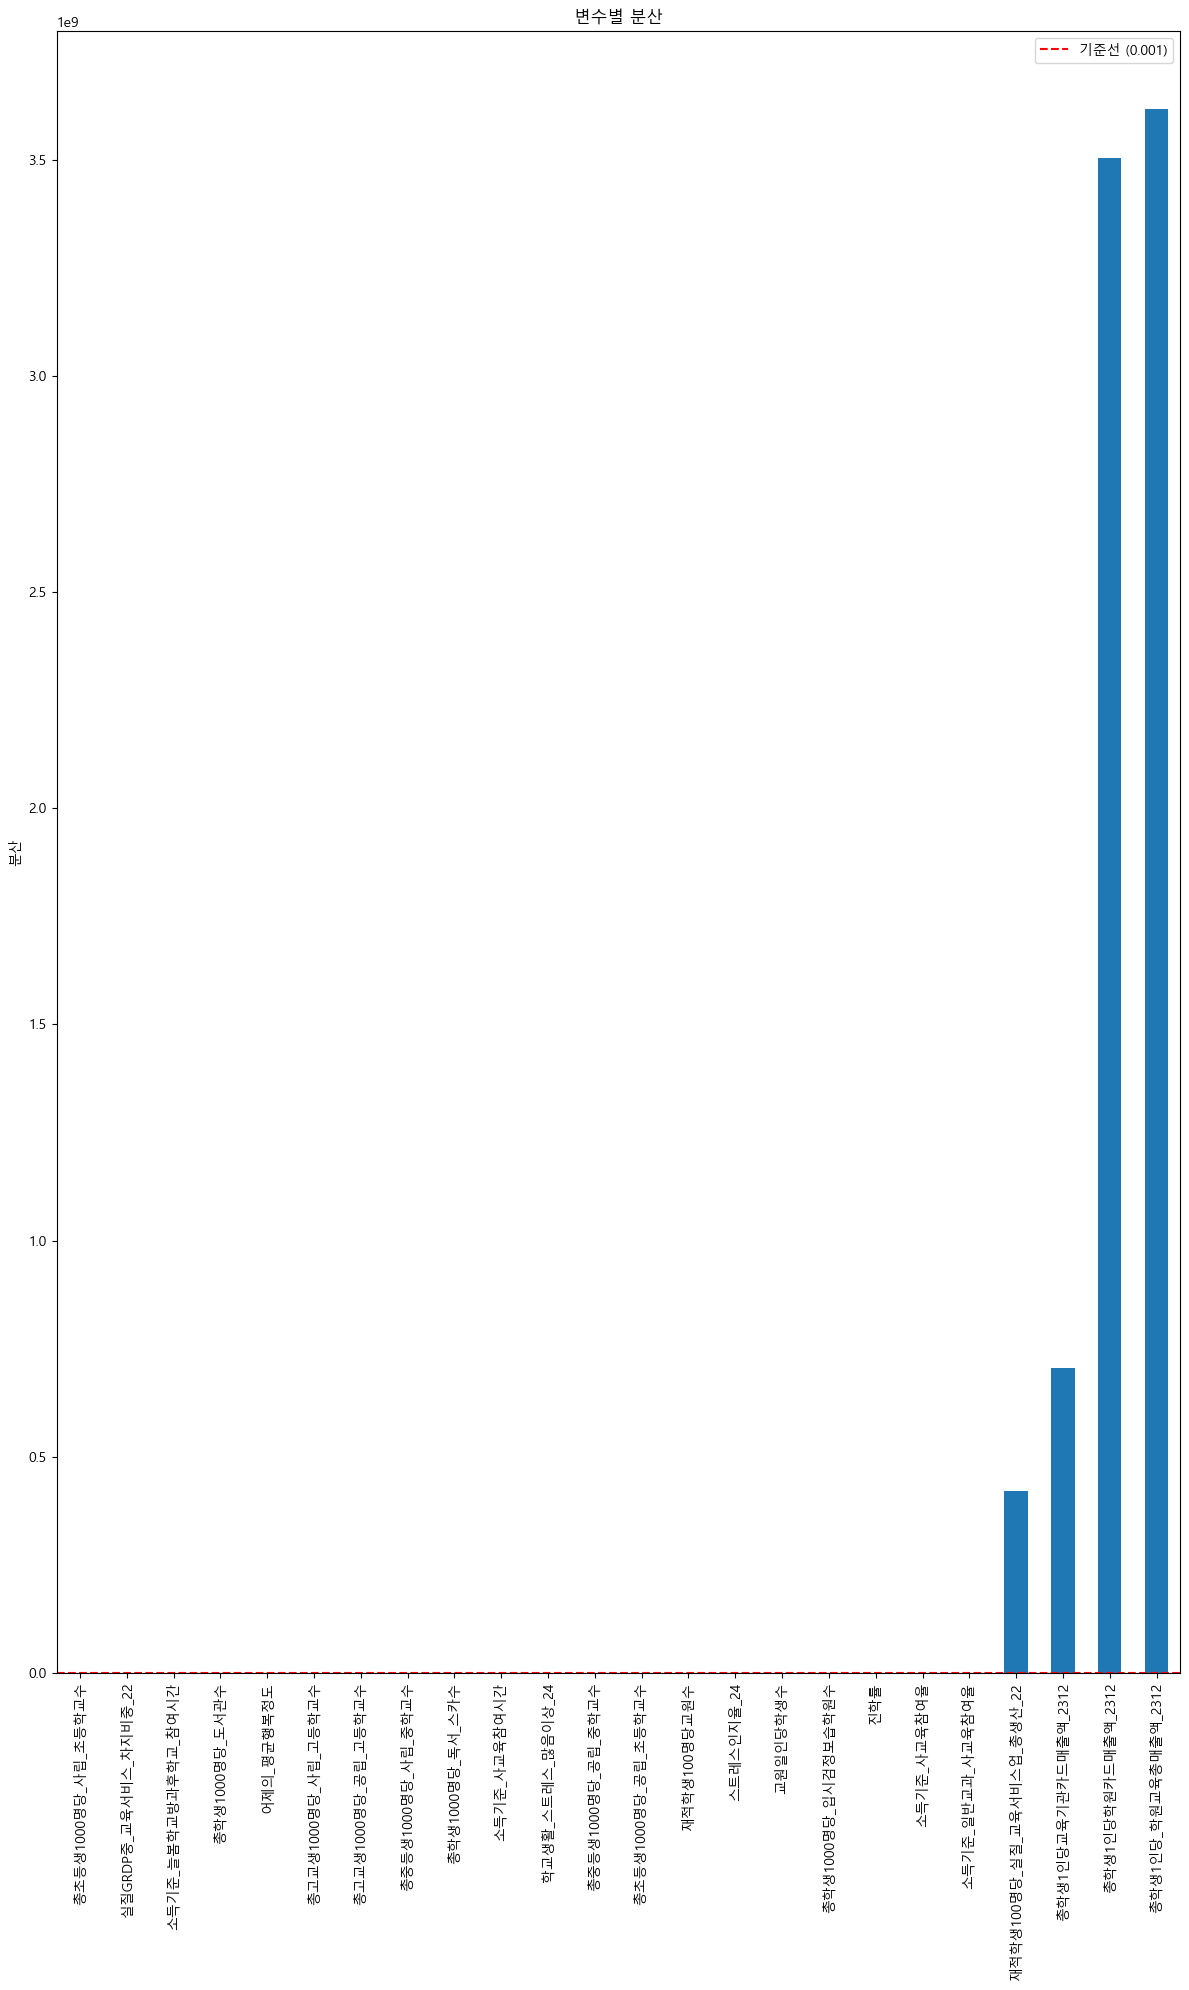

In [12]:
import matplotlib.pyplot as plt

variances = X.var().sort_values()

plt.figure(figsize=(12, 20))
variances.plot(kind='bar')
plt.axhline(y=0.001, color='red', linestyle='--', label='기준선 (0.001)')
plt.title("변수별 분산")
plt.ylabel("분산")
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
low_variance_cols = ['소득기준_늘봄학교방과후학교_참여시간', '어제의_평균행복정도', '총학생1000명당_도서관수', '총초등생1000명당_사립_초등학교수', '실질GRDP중_교육서비스_차지비중_22']

X = X.drop(columns=low_variance_cols)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled


array([[-3.39416775e+00, -1.27741291e+00, -1.29314065e+00,
        -1.25707872e+00,  5.72676111e-02, -3.06546343e+00,
         4.75886626e+00, -1.43688802e+00, -1.42092567e+00,
        -1.31030682e+00, -6.71703095e-01, -1.58655118e+00,
         1.44410209e+00,  4.00939574e+00,  5.39585386e+00,
        -6.40551262e-01,  3.59870698e+00, -1.10571120e+00,
         3.02487081e+00],
       [ 1.09140569e-01,  4.95486206e-01,  5.15096963e-01,
         4.71404521e-01, -1.54182030e+00, -3.59309864e-01,
        -2.19990355e-01, -9.03957763e-01, -3.96674455e-01,
        -1.03071157e+00, -6.50683585e-01, -1.30205523e+00,
         1.36229908e+00, -4.74031757e-01, -6.46876960e-01,
        -4.34788282e-01, -5.60079661e-01, -4.37881113e-01,
        -3.27800804e-01],
       [ 1.27995901e+00, -1.27741291e+00, -1.29314065e+00,
        -1.25707872e+00,  4.93382496e-01, -7.44515934e-02,
        -8.71645025e-01, -5.70401670e-01, -8.65080993e-01,
        -9.70204767e-01, -5.05039235e-01, -1.17814217e+00,
    

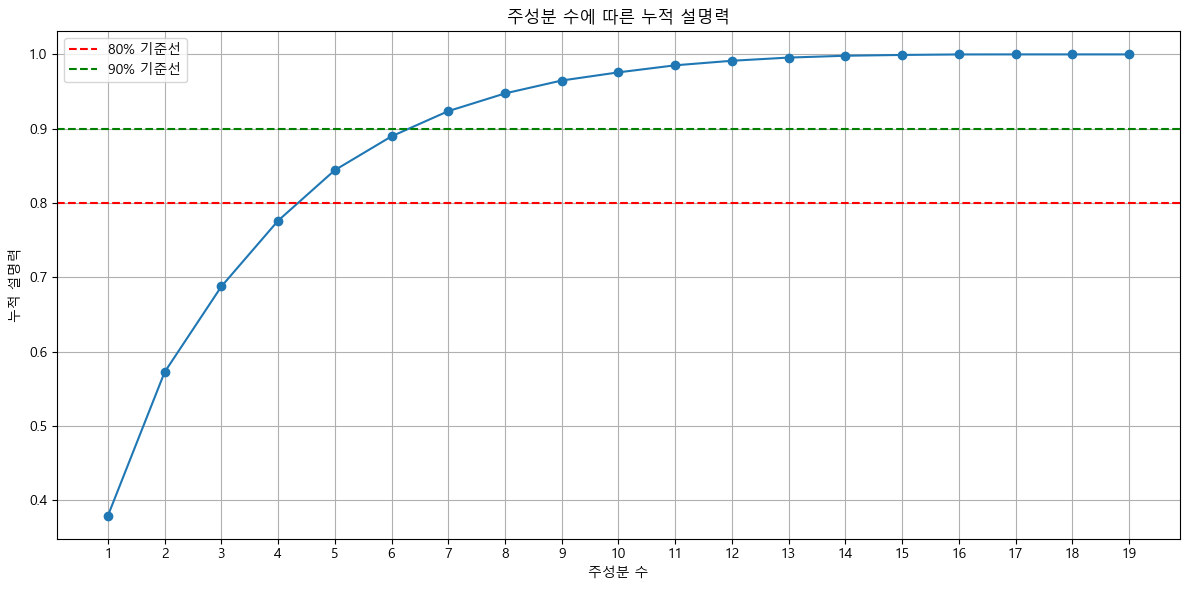

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# PCA 전체 주성분 적용
pca = PCA()
pca.fit(X_scaled)

# 설명력
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
n_components = len(cumulative_var)

# 시각화
plt.figure(figsize=(12, 6))
x_ticks = list(range(1, n_components + 1))

plt.plot(x_ticks, cumulative_var, marker='o')
plt.xticks(x_ticks)  # x축 정수 단위로 지정
plt.title('주성분 수에 따른 누적 설명력')
plt.xlabel('주성분 수')
plt.ylabel('누적 설명력')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% 기준선')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% 기준선')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
print(f"주성분 5개일 때 누적 설명력: {cumulative_var[4]:.4f}")


주성분 5개일 때 누적 설명력: 0.8442


In [18]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm  # 진행률 표시용 (선택)

# 테스트할 PCA 차원 수 목록
pca_dims = [2,3, 4,5, 6,7, 8]
k_range = range(2, 11)

# 결과 저장용
results = {}

for dim in tqdm(pca_dims):
    pca = PCA(n_components=dim)
    X_pca = pca.fit_transform(X_scaled)

    inertia_list = []
    silhouette_list = []
    dbi_list = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_pca)

        inertia_list.append(kmeans.inertia_)
        silhouette_list.append(silhouette_score(X_pca, labels))
        dbi_list.append(davies_bouldin_score(X_pca, labels))

    results[dim] = {
        'inertia': inertia_list,
        'silhouette': silhouette_list,
        'dbi': dbi_list
    }


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]C:\Users\YoonjinOh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\YoonjinOh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\YoonjinOh\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\YoonjinOh\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\

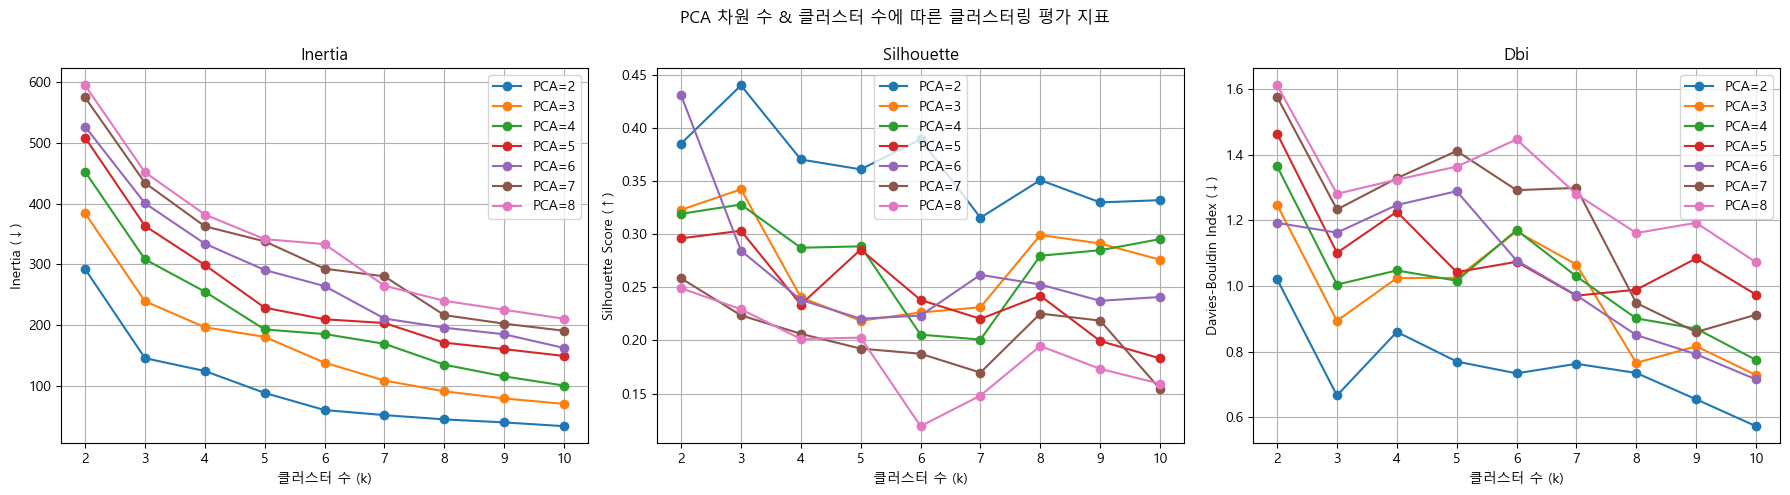

In [19]:
plt.figure(figsize=(18, 5))

for i, metric in enumerate(['inertia', 'silhouette', 'dbi']):
    plt.subplot(1, 3, i + 1)
    for dim in pca_dims:
        plt.plot(k_range, results[dim][metric], marker='o', label=f'PCA={dim}')
    plt.title(metric.capitalize())
    plt.xlabel("클러스터 수 (k)")
    plt.xticks(k_range)
    if metric == 'silhouette':
        plt.ylabel("Silhouette Score (↑)")
    elif metric == 'dbi':
        plt.ylabel("Davies-Bouldin Index (↓)")
    else:
        plt.ylabel("Inertia (↓)")
    plt.legend()
    plt.grid(True)

plt.suptitle("PCA 차원 수 & 클러스터 수에 따른 클러스터링 평가 지표")
plt.tight_layout()
plt.show()


In [20]:
!pip install kneed

In [20]:
from kneed import KneeLocator

elbow_points = {}

for dim in pca_dims:
    inertia = results[dim]['inertia']
    k_values = list(range(2, 11))

    # Elbow 포인트 자동 탐지
    knee = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
    
    elbow_k = knee.knee  # None일 수도 있음
    elbow_points[dim] = elbow_k

# 결과 출력
print("📍 Elbow 포인트 (PCA 차원 수별):")
for dim, k in elbow_points.items():
    print(f"  PCA={dim} → Elbow at k={k if k is not None else 'Not found'}")


📍 Elbow 포인트 (PCA 차원 수별):
  PCA=2 → Elbow at k=5
  PCA=3 → Elbow at k=6
  PCA=4 → Elbow at k=5
  PCA=5 → Elbow at k=5
  PCA=6 → Elbow at k=7
  PCA=7 → Elbow at k=4
  PCA=8 → Elbow at k=7


In [23]:
pip install adjustText


Note: you may need to restart the kernel to use updated packages.


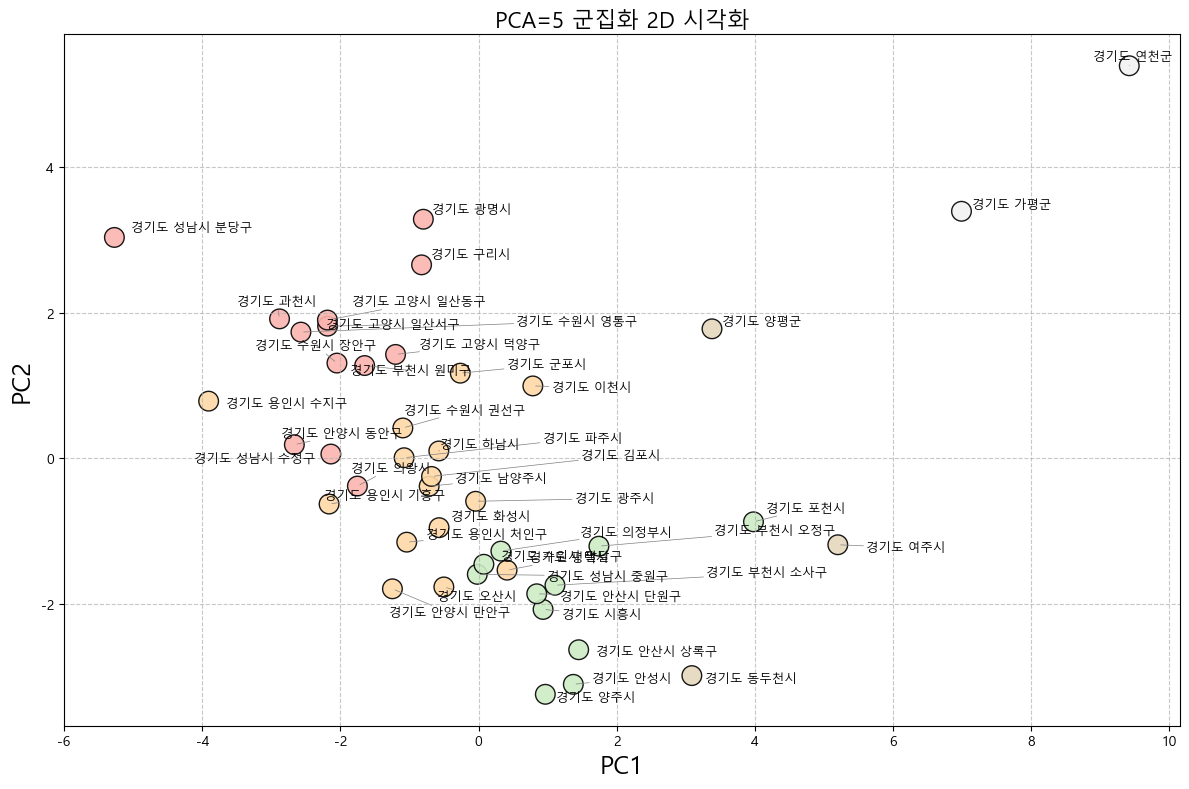

In [25]:
# 군집 번호 재매핑
remap = {
    3: 0,
    4: 1,
    0: 2,
    1: 3,
    2: 4
}
remapped_labels = np.vectorize(remap.get)(labels)

# 시각화 (기존 labels → remapped_labels 사용)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=remapped_labels, cmap='Pastel1', s=200, alpha=0.9, edgecolors='k')

texts = []
for i, name in enumerate(region_names):
    texts.append(plt.text(X_pca2[i, 0], X_pca2[i, 1], name, fontsize=9))

adjust_text(texts, 
            only_move={'points':'y', 'texts':'y'}, 
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title("PCA=5 군집화 2D 시각화", fontsize=16)
plt.xlabel("PC1", fontsize=18)
plt.ylabel("PC2", fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
 
# region_names = ["경기도 수원시 영통구", "경기도 성남시 분당구", ...] 이런 리스트로 되어있음
cluster_df = pd.DataFrame({
    '지역명': region_names,
    '클러스터': labels
})

# 클러스터별로 정렬
cluster_df = cluster_df.sort_values(by='클러스터').reset_index(drop=True)

# 확인
print(cluster_df)

# 저장하고 싶으면
# cluster_df.to_csv('클러스터별_행정동_리스트.csv', index=False)


             지역명  클러스터
0        경기도 파주시     0
1        경기도 김포시     0
2       경기도 남양주시     0
3        경기도 이천시     0
4    경기도 용인시 수지구     0
5    경기도 용인시 처인구     0
6        경기도 군포시     0
7        경기도 하남시     0
8        경기도 오산시     0
9        경기도 평택시     0
10       경기도 화성시     0
11   경기도 수원시 권선구     0
12       경기도 광주시     0
13   경기도 안양시 만안구     0
14   경기도 용인시 기흥구     0
15       경기도 여주시     1
16      경기도 동두천시     1
17       경기도 양평군     1
18       경기도 연천군     2
19       경기도 가평군     2
20   경기도 안양시 동안구     3
21   경기도 성남시 수정구     3
22       경기도 광명시     3
23   경기도 성남시 분당구     3
24   경기도 수원시 영통구     3
25       경기도 과천시     3
26   경기도 부천시 원미구     3
27   경기도 수원시 장안구     3
28  경기도 고양시 일산동구     3
29   경기도 고양시 덕양구     3
30  경기도 고양시 일산서구     3
31       경기도 구리시     3
32       경기도 의왕시     3
33   경기도 수원시 팔달구     4
34   경기도 안산시 상록구     4
35       경기도 포천시     4
36   경기도 안산시 단원구     4
37   경기도 부천시 오정구     4
38      경기도 의정부시     4
39       경기도 시흥시     4
40   경기도 부천시 소사구     4
41       경기도 안성시     4
42       경기

In [27]:
pip install geopandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [28]:
name_mapping = {
    '수원시 장안구': '경기도 수원시 장안구',
    '수원시 영통구': '경기도 수원시 영통구',
    '수원시 권선구': '경기도 수원시 권선구',
    '수원시 팔달구': '경기도 수원시 팔달구',
    '성남시수정구': '경기도 성남시 수정구',
    '성남시분당구': '경기도 성남시 분당구',
    '성남시중원구': '경기도 성남시 중원구',
    '의정부시': '경기도 의정부시',
    '안양시동안구': '경기도 안양시 동안구',
    '안양시만안구': '경기도 안양시 만안구',
    '원미구': '경기도 부천시 원미구',
    '오정구': '경기도 부천시 오정구',
    '소사구': '경기도 부천시 소사구',
    '광명시': '경기도 광명시',
    '평택시': '경기도 평택시',
    '동두천시': '경기도 동두천시',
    '안산시상록구': '경기도 안산시 상록구',
    '안산시단원구': '경기도 안산시 단원구',
    '일산서구': '경기도 고양시 일산서구',
    '덕양구': '경기도 고양시 덕양구',
    '일산동구': '경기도 고양시 일산동구',
    '과천시': '경기도 과천시',
    '구리시': '경기도 구리시',
    '남양주시': '경기도 남양주시',
    '오산시': '경기도 오산시',
    '시흥시': '경기도 시흥시',
    '군포시': '경기도 군포시',
    '의왕시': '경기도 의왕시',
    '하남시': '경기도 하남시',
    '기흥구': '경기도 용인시 기흥구',
    '수지구': '경기도 용인시 수지구',
    '처인구': '경기도 용인시 처인구',
    '파주시': '경기도 파주시',
    '이천시': '경기도 이천시',
    '안성시': '경기도 안성시',
    '김포시': '경기도 김포시',
    '화성시': '경기도 화성시',
    '광주시': '경기도 광주시',
    '양주시': '경기도 양주시',
    '포천시': '경기도 포천시',
    '여주시': '경기도 여주시',
    '연천군': '경기도 연천군',
    '가평군': '경기도 가평군',
    '양평군': '경기도 양평군'
}


In [29]:
# 기존 군집 → 새 군집으로 매핑
cluster_remap = {
    3: 0,  # 분당구 포함
    4: 1,  # 의정부시 포함
    0: 2,  # 화성시 포함
    1: 3,  # 동두천시 포함
    2: 4   # 가평군 포함
}


C:\Users\YoonjinOh\AppData\Local\Temp\ipykernel_14244\668025720.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  pastel_cmap = cm.get_cmap('Pastel1', 5)  # 군집이 5개니까


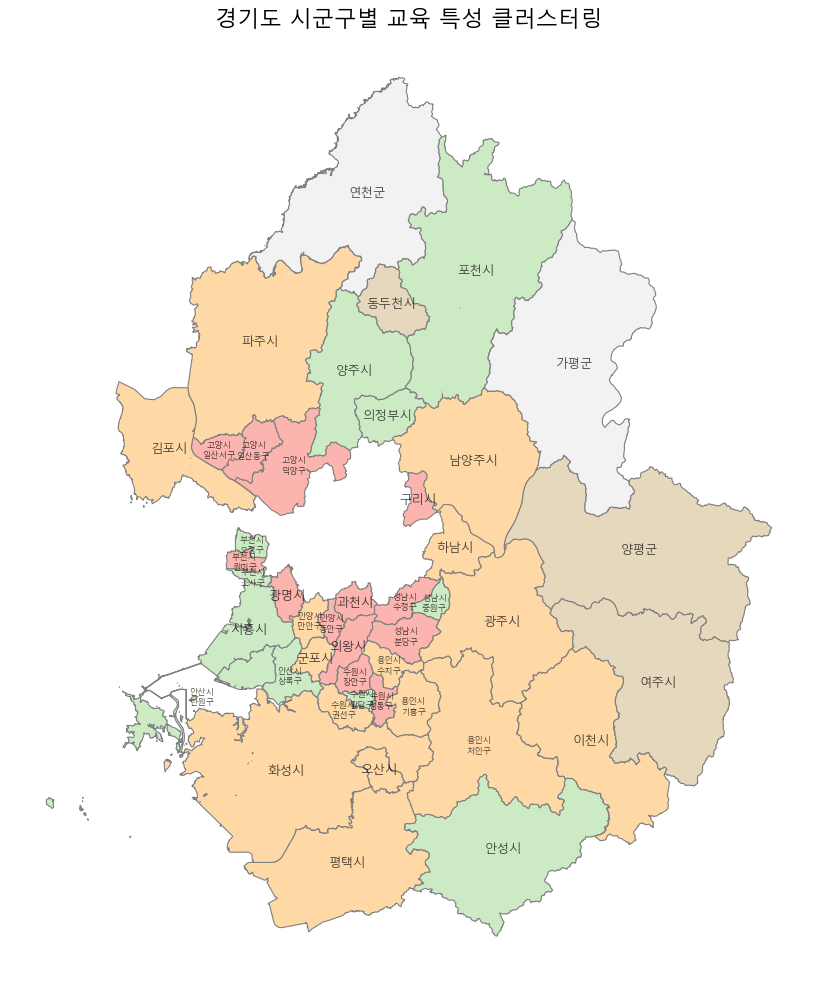

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd

# 지도 읽기
gdf = gpd.read_file("C:/Users/YoonjinOh/Desktop/LARD_ADM_SECT_SGG_경기/LARD_ADM_SECT_SGG_41_202504.shp",encoding='cp949')
gyeonggi_gdf = gdf.copy()

# 숫자형 데이터 제거
gyeonggi_gdf = gyeonggi_gdf[gyeonggi_gdf['SGG_NM'].apply(lambda x: not str(x).isdigit())]

# SGG_NM을 우리가 원하는 지역명으로 변환
gyeonggi_gdf['지역명'] = gyeonggi_gdf['SGG_NM'].map(name_mapping)

# region_names, labels 준비
mapping_df = pd.DataFrame({
    '지역명': region_names,
    '클러스터': labels
})

# merge
gyeonggi_gdf = gyeonggi_gdf.merge(mapping_df, on='지역명', how='left')

gyeonggi_gdf['클러스터'] = gyeonggi_gdf['클러스터'].map(cluster_remap)

# ✨ Pastel1 colormap에서 색 뽑기
pastel_cmap = cm.get_cmap('Pastel1', 5)  # 군집이 5개니까
colors = [mcolors.to_hex(pastel_cmap(i)) for i in range(5)]

# 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

for cluster in sorted(gyeonggi_gdf['클러스터'].dropna().unique()):
    cluster_data = gyeonggi_gdf[gyeonggi_gdf['클러스터'] == cluster]
    cluster_data.plot(
        ax=ax,
        color=colors[int(cluster)],
        edgecolor='gray',
        linewidth=0.8
    )

# 지도 위에 지역 이름 표시
cities_to_split = ['수원시', '성남시', '안양시', '부천시', '안산시', '고양시', '용인시']

for idx, row in gyeonggi_gdf.iterrows():
    if pd.notnull(row['지역명']):
        x, y = row['geometry'].centroid.coords[0]
        region_name = row['지역명'].replace('경기도 ', '')  # '경기도' 제거

        fontsize = 9  # 기본 글자 크기

        for city in cities_to_split:
            if city in region_name:
                region_name = region_name.replace(city + ' ', city + '\n')  # 줄바꿈
                fontsize = 6  # 📌 폰트 크기 더 작게
                break

        ax.text(
            x, y, region_name,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=fontsize,
            alpha=0.7
        )

plt.title('경기도 시군구별 교육 특성 클러스터링', fontsize=16)
plt.axis('off')
plt.tight_layout()

plt.savefig('C:/Users/YoonjinOh/Desktop/MOE/streamlit/gyeonggi_cluster_map.png', dpi=300)  # 고해상도 저장

plt.show()


In [31]:
pca_2d = PCA(n_components=2)
X_pca2 = pca_2d.fit_transform(X_scaled)

# 주성분별 변수 기여도 (로딩)
pca_loadings = pd.DataFrame(
    pca_2d.components_.T,
    columns=["PC1", "PC2"],
    index=X.columns
)


In [32]:
pc1_sorted = pca_loadings['PC1'].sort_values(ascending=False)
pc2_sorted = pca_loadings['PC2'].sort_values(ascending=False)

In [33]:
# PC1 기여도 높은 변수 DataFrame
pc1_sorted_df = pd.DataFrame({
    '변수명': pc1_sorted.index,
    'PC1 기여도': pc1_sorted.values
}).reset_index(drop=True)

# PC2 기여도 높은 변수 DataFrame
pc2_sorted_df = pd.DataFrame({
    '변수명': pc2_sorted.index,
    'PC2 기여도': pc2_sorted.values
}).reset_index(drop=True)

In [34]:
pc1_sorted_df

,변수명,PC1 기여도
0,총초등생1000명당_공립_초등학교수,0.326531
1,총중등생1000명당_공립_중학교수,0.264377
2,재적학생100명당교원수,0.255496
3,총고교생1000명당_공립_고등학교수,0.245991
4,진학률,0.194446
5,재적학생100명당_실질_교육서비스업_총생산_22,0.169250
6,총중등생1000명당_사립_중학교수,0.157296
7,총고교생1000명당_사립_고등학교수,0.111289
8,스트레스인지율_24,0.071468
9,총학생1인당교육기관카드매출액_2312,0.055414


In [35]:
pc2_sorted_df

,변수명,PC2 기여도
0,재적학생100명당_실질_교육서비스업_총생산_22,0.408708
1,재적학생100명당교원수,0.349290
2,총고교생1000명당_공립_고등학교수,0.292874
3,총학생1인당학원카드매출액_2312,0.244311
4,총학생1000명당_입시검정보습학원수,0.241425
5,소득기준_사교육참여시간,0.237106
6,소득기준_사교육참여율,0.236969
7,소득기준_일반교과_사교육참여율,0.236626
8,총중등생1000명당_공립_중학교수,0.233434
9,총학생1인당_학원교육총매출액_2312,0.225250


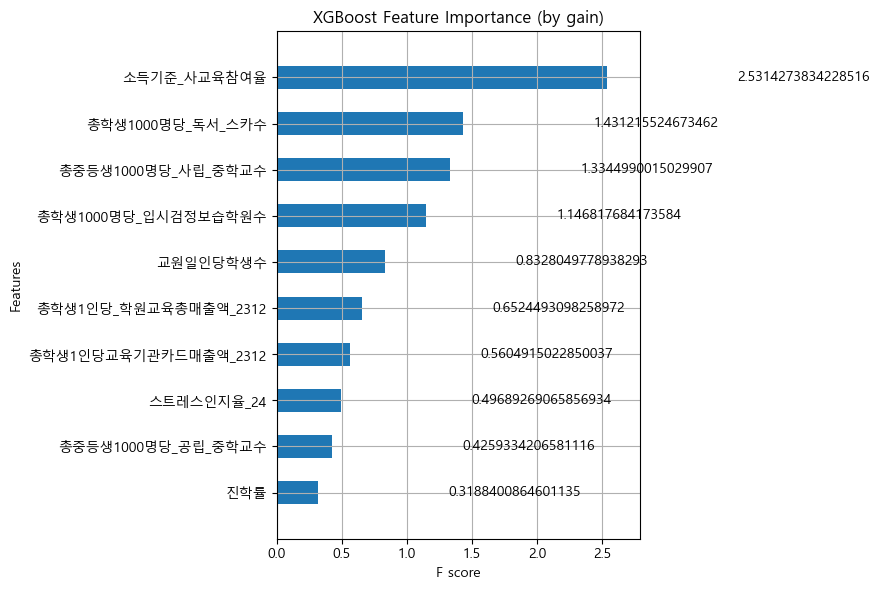

In [36]:
import matplotlib.pyplot as plt
import xgboost as xgb

# XGBoost 모델 학습
model = xgb.XGBClassifier()
model.fit(X_scaled, labels)

# 변수명 매핑: f0 → 실제 변수 이름
feature_map = {f"f{i}": col for i, col in enumerate(X.columns)}

# matplotlib 시각화용: 실제 변수명을 사용
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(model, 
                    importance_type='gain', 
                    max_num_features=10,
                    height=0.5,
                    ax=ax)

# 축 레이블 업데이트
tick_labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels([feature_map.get(lbl, lbl) for lbl in tick_labels])

plt.title("XGBoost Feature Importance (by gain)")
plt.tight_layout()
plt.show()


In [37]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [38]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [44]:
import shap
import matplotlib.pyplot as plt
import os

# 저장 경로 설정
save_dir = r"C:\Users\YoonjinOh\Desktop\MOE\SHAP"
os.makedirs(save_dir, exist_ok=True)

# SHAP 계산
explainer = shap.TreeExplainer(model)
shap_values_raw = explainer.shap_values(X_scaled_df)

# 3D → 리스트 변환: [샘플, 피처, 클래스] → [클래스][샘플, 피처]
if isinstance(shap_values_raw, np.ndarray) and shap_values_raw.ndim == 3:
    print("⛑️ Detected 3D SHAP output — reshaping into per-class list...")
    shap_values = [shap_values_raw[:, :, i] for i in range(shap_values_raw.shape[2])]
else:
    shap_values = shap_values_raw  # 그대로 사용

# summary plot 저장
for i in range(len(shap_values)):
    print(f"\n🔍 클러스터 {i}에 대한 SHAP summary plot")

    shap.summary_plot(shap_values[i], X_scaled_df, show=False)  # 화면 출력 방지
    plt.title(f"Cluster {i} SHAP Summary")
    
    save_path = os.path.join(save_dir, f"shap_summary_cluster_{i}.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()  # 현재 plot 닫기 (다음 plot에 영향 방지)



⛑️ Detected 3D SHAP output — reshaping into per-class list...

🔍 클러스터 0에 대한 SHAP summary plot

🔍 클러스터 1에 대한 SHAP summary plot

🔍 클러스터 2에 대한 SHAP summary plot

🔍 클러스터 3에 대한 SHAP summary plot

🔍 클러스터 4에 대한 SHAP summary plot


In [45]:
import pandas as pd
import numpy as np

# shap_values: [클러스터][샘플, 피처] 형태라고 가정
# X_scaled_df: (샘플, 피처) 형태의 데이터프레임

# 1. 클러스터별로 mean(abs(SHAP)) 계산
cluster_shap_summary = {}

for cluster_idx, shap_value in enumerate(shap_values):
    # shap_value: (샘플수, 피처수)
    mean_abs_shap = np.abs(shap_value).mean(axis=0)  # axis=0으로 피처별 평균
    cluster_shap_summary[f'클러스터_{cluster_idx}'] = mean_abs_shap

# 2. 데이터프레임으로 변환
cluster_shap_summary_df = pd.DataFrame(
    cluster_shap_summary,
    index=X_scaled_df.columns
).reset_index()

# 컬럼 이름 정리
cluster_shap_summary_df.rename(columns={'index': 'Feature'}, inplace=True)

# 결과 출력
cluster_shap_summary_df

,Feature,클러스터_0,클러스터_1,클러스터_2,클러스터_3,클러스터_4
0,교원일인당학생수,0.239826,0.000000,0.216680,0.037152,0.881301
1,소득기준_사교육참여율,0.934761,0.000000,0.000000,0.000000,1.675483
2,소득기준_일반교과_사교육참여율,0.000000,0.000000,0.000000,0.000000,0.000000
3,소득기준_사교육참여시간,0.000000,0.000000,0.000000,0.000000,0.000000
4,스트레스인지율_24,0.029181,0.000000,0.000000,0.000000,0.000000
5,학교생활_스트레스_많음이상_24,0.167259,0.000000,0.000000,0.000000,0.060381
6,재적학생100명당교원수,0.000000,0.000000,0.000000,0.000000,0.000000
7,총학생1000명당_독서_스카수,0.322511,0.000000,0.220477,1.242222,0.027022
8,총학생1000명당_입시검정보습학원수,0.172280,0.000000,0.000000,1.129515,0.000000
9,총학생1인당학원카드매출액_2312,0.132305,0.122081,0.000000,0.000000,0.027735


In [46]:
cluster_shap_summary_df.to_csv('C:/Users/YoonjinOh/Desktop/MOE/streamlit/SHAP_total.csv')

In [39]:
import pandas as pd
import numpy as np

# SHAP 값을 정리해서 클러스터별 중요도 DataFrame 만들기
def get_shap_summary_df(shap_values, feature_names, top_n=20):
    summary_list = []

    for i, sv in enumerate(shap_values):
        abs_mean = np.abs(sv).mean(axis=0)
        df = pd.DataFrame({
            "feature": feature_names,
            f"mean(|SHAP value|)_cluster{i}": abs_mean
        }).sort_values(by=f"mean(|SHAP value|)_cluster{i}", ascending=False).head(top_n)
        summary_list.append(df.set_index("feature"))

    # 클러스터별 중요도 병합
    summary_df = pd.concat(summary_list, axis=1)
    return summary_df


In [40]:
shap_summary_df = get_shap_summary_df(shap_values, X_scaled_df.columns, top_n=15)
display(shap_summary_df)


,mean(|SHAP value|)_cluster0,mean(|SHAP value|)_cluster1,mean(|SHAP value|)_cluster2,mean(|SHAP value|)_cluster3,mean(|SHAP value|)_cluster4
feature,,,,,
총학생1인당학원카드매출액_2312,1.068792,0.076876,0.366038,0.000000,0.066152
총학생1000명당_입시검정보습학원수,0.704218,NaN,0.157744,0.054502,0.000000
총학생1인당_학원교육총매출액_2312,0.678638,0.027428,0.505676,0.000000,0.000000
학교생활_스트레스_많음이상_24,0.359101,0.120881,0.085727,NaN,NaN
총중등생1000명당_사립_중학교수,0.236850,0.011787,0.045171,0.000000,0.851505
총초등생1000명당_공립_초등학교수,0.150581,0.020634,0.058421,0.000000,0.061945
진학률,0.034976,0.000000,0.140981,0.278983,0.000000
총고교생1000명당_공립_고등학교수,0.026636,0.039166,0.000000,0.060517,0.000000
총학생1인당교육기관카드매출액_2312,0.024592,NaN,0.428673,0.000000,0.000000
